# Edits of class_expansions.py: test class and file

## Alexandra Semposki

### Date: 09 August 2021

In [1]:
import numpy as np
from scipy import integrate, stats, special
import time
import cycler 
import emcee
import matplotlib.pyplot as plt
%matplotlib inline

from class_expansions import Mixing, Switching

In [2]:
#set up initial object
g_true = np.linspace(1e-6, 0.5, 100)
g_data = np.linspace(0.1, 0.2, 20)
g_ppd = np.linspace(1e-6, 0.5, 200)
low = np.array([5])
high = np.array([23])

In [3]:
test = Mixing()

Welcome to the BMM sandbox! Here you get to play!


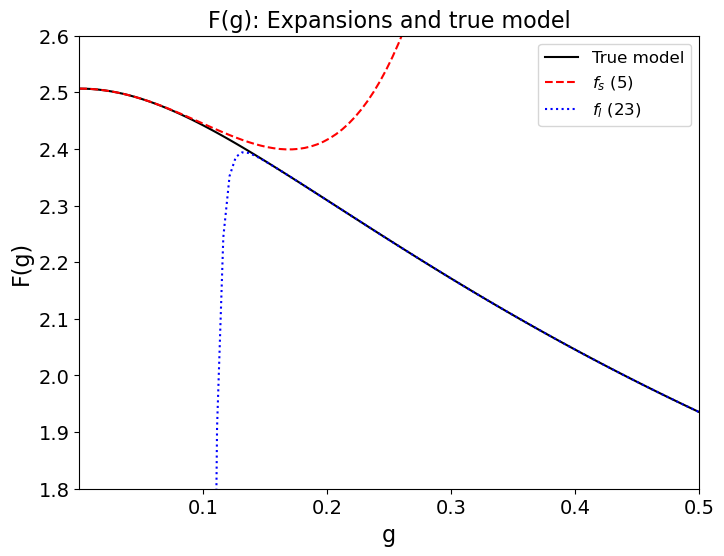

In [4]:
test.plot_models(g_true, low, high)

What percent error would you like on your data (please enter a decimal)?0.01


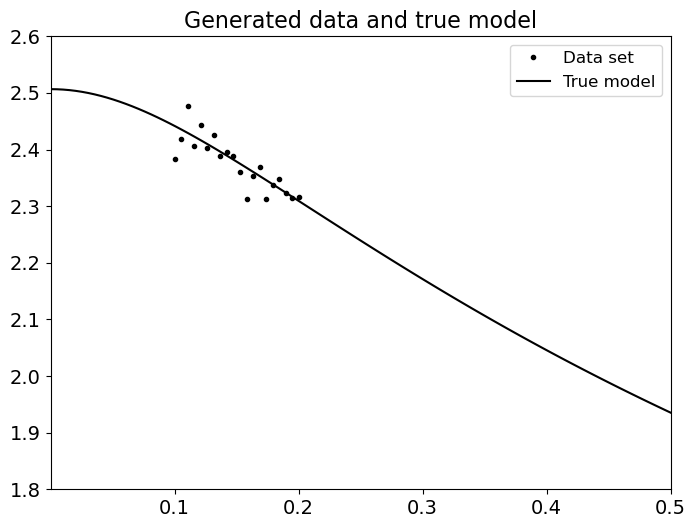

[2.38365532 2.41928593 2.47604588 2.40698344 2.4427016  2.40190242
 2.42618126 2.38864017 2.39495139 2.38802567 2.3608482  2.31315808
 2.35407599 2.36888447 2.31181798 2.33727868 2.34783553 2.32253775
 2.31439042 2.31578092]


In [5]:
data, sigma = test.generate_data(g_true, g_data)
print(data)

In [6]:
mu0 = 10.00
mu1 = -20.00
sig0 = 2.0
sig1 = 10.0

In [10]:
trace = test.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g_1: 0.1
Enter a guess for the standard deviation of the parameter g_1: 0.01
Enter a guess for the mean of the parameter g_2: 0.2
Enter a guess for the standard deviation of the parameter g_2: 0.01
Enter a guess for the mean of the parameter g_3: 0.16
Enter a guess for the standard deviation of the parameter g_3: 0.01
Using 10 walkers with 1000 steps each, for a total of 10000 samples.


C:\Users\Alexandra\Desktop\Phillips_Research\Furnstahl_Summer_2021\BMM\BAND_BMM_Expansions\class_expansions_v2.py:969: RuntimeWarning: divide by zero encountered in log
  log_ml[i] = np.log(mixed_likelihood[i])
C:\Users\Alexandra\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Calculation finished!
Duration = 1 min, 12 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.
(3, 8000)


In [11]:
print(trace)

#print the mean of both traces out
mean_beta0 = np.mean(trace[0].T)
mean_beta1 = np.mean(trace[1].T)
mean_beta2 = np.mean(trace[2].T)
print('Mean of beta0: {}'.format(mean_beta0))
print('Mean of beta1: {}'.format(mean_beta1))
print('Mean of beta2: {}'.format(mean_beta2))

#hpd intervals 
ci_beta0 = test.credible_intervals(trace[0], 0.95)
ci_beta1 = test.credible_intervals(trace[1], 0.95)
ci_beta2 = test.credible_intervals(trace[2], 0.95)
print('Credible interval, beta0: {}'.format(ci_beta0))
print('Credible interval, beta1: {}'.format(ci_beta1))
print('Credible interval, beta2: {}'.format(ci_beta2))

[[0.10166824 0.10294343 0.10294343 ... 0.10094316 0.10094316 0.10094316]
 [0.19925948 0.20070323 0.20070323 ... 0.20794778 0.20794778 0.20794778]
 [0.16147571 0.16067214 0.16067214 ... 0.15540572 0.15540572 0.15540572]]
Mean of beta0: 0.10172957195497802
Mean of beta1: 0.19664139201091985
Mean of beta2: 0.15274598135325948
Credible interval, beta0: [0.08150192 0.11972133]
Credible interval, beta1: [0.17790473 0.21535307]
Credible interval, beta2: [0.13680461 0.17098778]


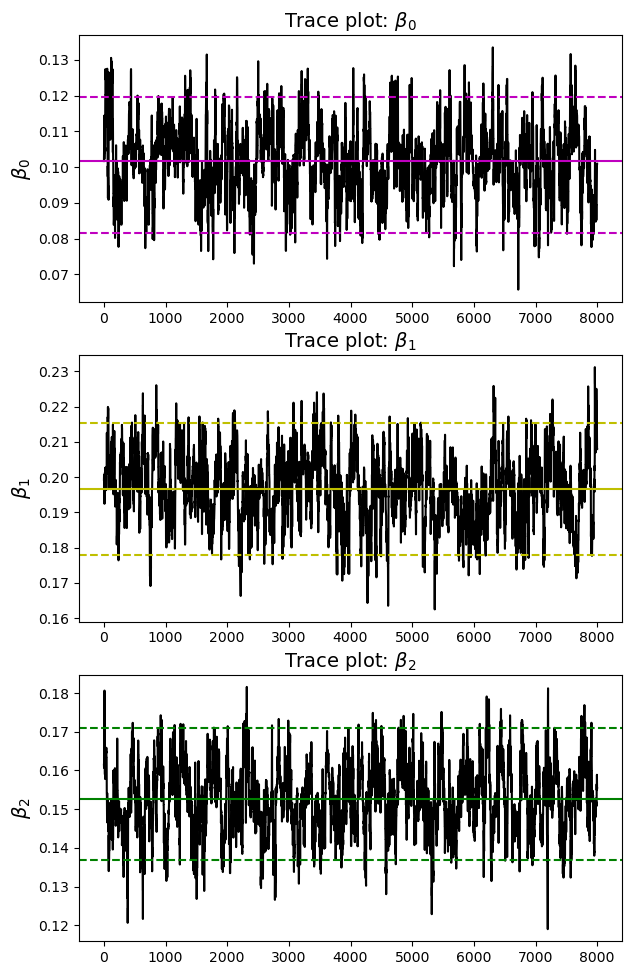

In [12]:
ndim = len(trace)

fix, ax = plt.subplots(3,1,figsize=(7,4*ndim), dpi=100)

for irow in range(ndim):
    ax[irow].plot(trace[irow].T, 'k')
    ax[irow].set_ylabel(r'$\beta_{0}$'.format(irow), fontsize=14)
    ax[irow].set_title(r'Trace plot: $\beta_{0}$'.format(irow), fontsize=14)

ax[0].axhline(y=mean_beta0, color='m', linestyle='solid')
ax[1].axhline(y=mean_beta1, color='y', linestyle='solid')
ax[2].axhline(y=mean_beta2, color='g', linestyle='solid')
ax[0].axhline(y=ci_beta0[0], color='m', linestyle='dashed')
ax[0].axhline(y=ci_beta0[1], color='m', linestyle='dashed')
ax[1].axhline(y=ci_beta1[0], color='y', linestyle='dashed')
ax[1].axhline(y=ci_beta1[1], color='y', linestyle='dashed')
ax[2].axhline(y=ci_beta2[0], color='g', linestyle='dashed')
ax[2].axhline(y=ci_beta2[1], color='g', linestyle='dashed')

__Observations__: The cosine option in the mixing model runs into a divide by zero in the log likelihood, yet seems to run the parameters well enough otherwise to get good values, as seen above. Will figure out/discuss this later. 

__Progress__: Can now find g1, g2, and g3 instead of just g3 as before. 

__Work to do__: Need to run this through with the PPD (will do in BMM_Expansions_Project.ipynb file), and also work on shortening the PPD functions to one general function as was done here with the switching functions sent to the sampler. Also need to be able to import data and sigma arrays from the user, and use different priors. We also need to determine what was the cause of the divide by zero warning issued above. 